Conor Johnston S1219419  Big Data Landscapes Final Assessments

users of this notebook will need to install facebook prophet library using conda or pip: https://facebook.github.io/prophet/docs/installation.html

Datasets original source url: https://data.world/bhavnachawla/population-fertility-rate-life-expectancy

Question: Can we make predictions on future populations, fertility rates and life expectancies in a selected country and identify the trend of the predictions given.


In [205]:

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

After imports have been declared, we will bring in the raw data and put it into a dataframe, we will do this through the use of the pandas library which has been imported and declared above. The Datasets that have been found for this question are taken directly from the site.

In [206]:
populationData = pd.read_excel('https://query.data.world/s/j2rk7koyqvu5uskdwi77d2zyctx7s5')

In [207]:
fertilityData = pd.read_excel('https://query.data.world/s/mwbzjh2c7ooeuhrhv53luf7vv74o36')

In [208]:
lifeExpectancyData = pd.read_excel('https://query.data.world/s/awprsk7pezwi263ianzjbh72f7iz5b')

In [209]:
print(populationData.shape)
populationData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0


In [210]:
print(lifeExpectancyData.shape)
lifeExpectancyData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,...,74.090854,74.228073,74.375707,74.526244,74.67422,74.816146,74.952024,75.08039,75.206756,75.332171


In [211]:
print("Fertility Data info: - ")
print(fertilityData.shape)
fertilityData.head(1)

Fertility Data info: - 
(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.69,1.681,1.673


In [212]:
## initialize the Prophet object this object will be used later to 
## predict values in the future based on current ones and plot them
## to a graph.

p = Prophet()

In [213]:
popdupdata = populationData[populationData.duplicated()]

print("Number of Duplicate Rows: ", popdupdata.shape)
print(populationData.isnull().sum())
##just for Aruba being 1'st on the list i.e the head(1) value
print(populationData.head(1).isnull().sum())

Number of Duplicate Rows:  (0, 58)
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
1961              4
1962              4
1963              4
1964              4
1965              4
1966              4
1967              4
1968              4
1969              4
1970              4
1971              4
1972              4
1973              4
1974              4
1975              4
1976              4
1977              4
1978              4
1979              4
1980              4
1981              4
1982              4
1983              4
1984              4
1985              4
1986              4
1987              4
1988              4
1989              4
1990              2
1991              2
1992              3
1993              3
1994              3
1995              2
1996              2
1997              2
1998              1
1999              1
2000              1
2001              1
2002              1
2003              1
2004 

In [214]:
## using the prophet fit method to analyze the parameters of the specified parameters
##p.fit(populationData)

In [215]:
populationData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [216]:
populationData.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [217]:
populationData.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,78337.0,81223.0,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,23499850.0,24399948.0,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,17295500.0,17912942.0,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900489.0,2897366.0


In [218]:
populationData.transpose()
print("success")

success


In [219]:
##manually typing out the code to rename the columns into the needed format is haunting so we will cheat a bit and
##automate it slightly by creating a function that will loop through our preporcessed data columns and create the
##name change using a small application of conditions and string concatonation 

In [220]:

for item, df in populationData.items():
    if item != "Country Name":
        print(item)
        newName = item+'-12-31'
        print(newName)
        populationData.rename(columns = {item:newName}, inplace=True)
        

1960
1960-12-31
1961
1961-12-31
1962
1962-12-31
1963
1963-12-31
1964
1964-12-31
1965
1965-12-31
1966
1966-12-31
1967
1967-12-31
1968
1968-12-31
1969
1969-12-31
1970
1970-12-31
1971
1971-12-31
1972
1972-12-31
1973
1973-12-31
1974
1974-12-31
1975
1975-12-31
1976
1976-12-31
1977
1977-12-31
1978
1978-12-31
1979
1979-12-31
1980
1980-12-31
1981
1981-12-31
1982
1982-12-31
1983
1983-12-31
1984
1984-12-31
1985
1985-12-31
1986
1986-12-31
1987
1987-12-31
1988
1988-12-31
1989
1989-12-31
1990
1990-12-31
1991
1991-12-31
1992
1992-12-31
1993
1993-12-31
1994
1994-12-31
1995
1995-12-31
1996
1996-12-31
1997
1997-12-31
1998
1998-12-31
1999
1999-12-31
2000
2000-12-31
2001
2001-12-31
2002
2002-12-31
2003
2003-12-31
2004
2004-12-31
2005
2005-12-31
2006
2006-12-31
2007
2007-12-31
2008
2008-12-31
2009
2009-12-31
2010
2010-12-31
2011
2011-12-31
2012
2012-12-31
2013
2013-12-31


In [221]:
##outputing the information to show that the names of the columns have been changed to match the necessary date format
##in the form YYYY-MM-DD 
populationData.head(1)

,Country Name,1960-12-31,1961-12-31,1962-12-31,1963-12-31,1964-12-31,1965-12-31,1966-12-31,1967-12-31,1968-12-31,...,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,98742.0,100031.0,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0


With this format achieved it is time to get to the modelling, for this we need to put the data from the datasets in a format that can be read and analysed by facebook prophet to achieve not only our modelling purposes but our prediction purposes as well. We will use Aruba as the Example piece from the dataset for this.

In [222]:
data = []
for year, i in populationData.items():
    if year != "Country Name":
       ## print date.
   
        data.append(year)

print(data)
##df = pd.DataFrame(data, columns = ['Date', 'Population'])

['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31']


In [223]:
column = populationData
column.drop(["Country Name"], axis=1, inplace=True)




In [224]:
dates = column.columns
print(dates[0])

1960-12-31


In [225]:
population = populationData.iloc[0]
pops= population.iloc[0:]


print(dates.shape)
print(pops.shape)


## Data is the same shape and can now be mapped
##df = pd.DataFrame(val.iloc[1:], columns = ['Date', 'Population'])


(54,)
(54,)


In [226]:
data = []
for x in range(0 , len(population)):
    data.append([dates[x] , pops.iloc[x]])
print(data)
df = pd.DataFrame(data, columns = ['Date', 'Population'])

[['1960-12-31', 54208.0], ['1961-12-31', 55435.0], ['1962-12-31', 56226.0], ['1963-12-31', 56697.0], ['1964-12-31', 57029.0], ['1965-12-31', 57360.0], ['1966-12-31', 57712.0], ['1967-12-31', 58049.0], ['1968-12-31', 58385.0], ['1969-12-31', 58724.0], ['1970-12-31', 59065.0], ['1971-12-31', 59438.0], ['1972-12-31', 59849.0], ['1973-12-31', 60239.0], ['1974-12-31', 60525.0], ['1975-12-31', 60655.0], ['1976-12-31', 60589.0], ['1977-12-31', 60366.0], ['1978-12-31', 60106.0], ['1979-12-31', 59978.0], ['1980-12-31', 60096.0], ['1981-12-31', 60567.0], ['1982-12-31', 61344.0], ['1983-12-31', 62204.0], ['1984-12-31', 62831.0], ['1985-12-31', 63028.0], ['1986-12-31', 62644.0], ['1987-12-31', 61835.0], ['1988-12-31', 61077.0], ['1989-12-31', 61032.0], ['1990-12-31', 62148.0], ['1991-12-31', 64623.0], ['1992-12-31', 68235.0], ['1993-12-31', 72498.0], ['1994-12-31', 76700.0], ['1995-12-31', 80326.0], ['1996-12-31', 83195.0], ['1997-12-31', 85447.0], ['1998-12-31', 87276.0], ['1999-12-31', 89004.0],

In [227]:
df.head()

,Date,Population
0,1960-12-31,54208.0
1,1961-12-31,55435.0
2,1962-12-31,56226.0
3,1963-12-31,56697.0
4,1964-12-31,57029.0


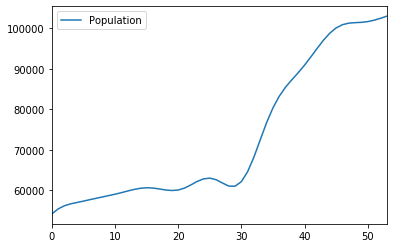

In [228]:
df.plot()

In [229]:
##lets start the prophet model
model = Prophet()

In [230]:
df.columns

Index(['Date', 'Population'], dtype='object')

In [231]:
df.rename(columns={'Date':'ds','Population':'y'}, inplace=True)

In [232]:
df.head()

,ds,y
0,1960-12-31,54208.0
1,1961-12-31,55435.0
2,1962-12-31,56226.0
3,1963-12-31,56697.0
4,1964-12-31,57029.0


In [233]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [234]:
futureYears = model.make_future_dataframe(periods=10,freq='Y')

In [235]:
futureYears.tail(10)

,ds
54,2014-12-31
55,2015-12-31
56,2016-12-31
57,2017-12-31
58,2018-12-31
59,2019-12-31
60,2020-12-31
61,2021-12-31
62,2022-12-31
63,2023-12-31


In [236]:
prediction = model.predict(futureYears)

In [237]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
59,2019-12-31,54556.018255,106125.218159,110899.546961,52465.888056,56719.233711,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,0.0,0.0,0.0,108400.825685
60,2020-12-31,55262.360766,106206.544641,111861.030743,52608.237658,58040.038669,53686.000756,53686.000756,53686.000756,53686.000756,53686.000756,53686.000756,0.0,0.0,0.0,108948.361522
61,2021-12-31,55966.773379,106265.633576,113292.404026,52718.931583,59403.591220,53772.398789,53772.398789,53772.398789,53772.398789,53772.398789,53772.398789,0.0,0.0,0.0,109739.172168
62,2022-12-31,56671.185992,106480.651800,114770.896782,52777.443776,60705.859063,53825.528176,53825.528176,53825.528176,53825.528176,53825.528176,53825.528176,0.0,0.0,0.0,110496.714168
63,2023-12-31,57375.598605,106502.377404,116235.730082,52787.564051,62167.421747,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,53844.807430,0.0,0.0,0.0,111220.406036


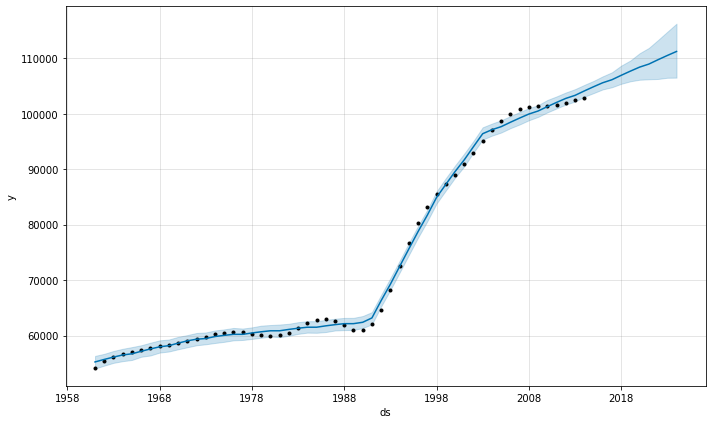

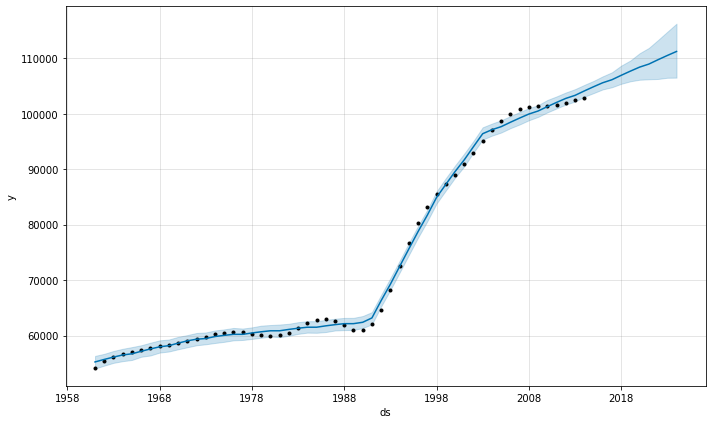

In [238]:
model.plot(prediction)

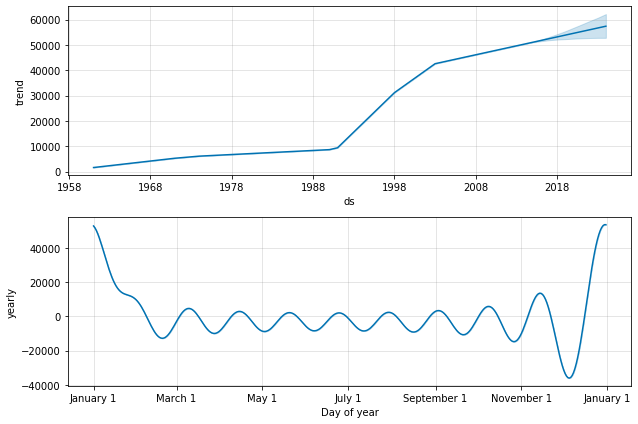

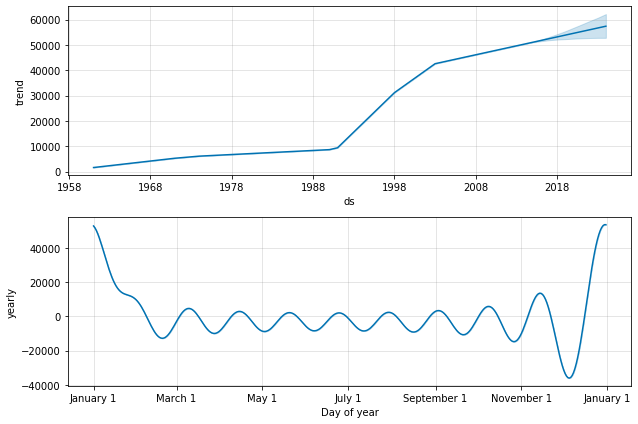

In [239]:
model.plot_components(prediction)

By proviving with the population data that the concept can be achieve we must iterate through the process again two more times, one for fertility data and once more for the life expectancy data.

Conclusion drawn from the population data: it is in-fact possible to predict the future population of Aruba, using facebooks time series analysis modelling we even get a graphic visualization with the margins of error for each prediction, which increases the further forward we predict. We can go above and beyond just a one year prediction like we were trying to answer with our original question and can in-fact as we have done managed to secure a prediction for each year for 10 years beyond what the original data covers.
Furthermore using the Facebook prophet API we even are given option *as shown above* to model the components of the prediction model for user friendly viewing in the stead of the hard statistics.

The trend of this graph shows that the predictions for the population are increasing over time.

We are going to go through the same process with fertility data and and see if we can get a similar result as above with the population data.

In [240]:
print(fertilityData.shape)
fertilityData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.82,4.655,4.471,4.271,4.059,3.842,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.69,1.681,1.673


In [241]:
ferdupdata = fertilityData[fertilityData.duplicated()]

print("Number of Duplicate Rows: ", ferdupdata.shape)
print(fertilityData.isnull().sum())
##just for Aruba being 1'st on the list i.e the head(1) value
print(fertilityData.head(1).isnull().sum())

Number of Duplicate Rows:  (0, 58)
Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              25
1961              24
1962              25
1963              26
1964              25
1965              25
1966              25
1967              25
1968              25
1969              25
1970              25
1971              24
1972              23
1973              25
1974              25
1975              25
1976              24
1977              25
1978              25
1979              25
1980              25
1981              23
1982              20
1983              23
1984              23
1985              23
1986              23
1987              19
1988              23
1989              23
1990              20
1991              20
1992              17
1993              21
1994              20
1995              18
1996              21
1997              17
1998              20
1999              19
2000              17
2001              16

In [242]:
fertilityData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [243]:
fertilityData.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [244]:
fertilityData.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.690,1.681,1.673
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.240,1.180,1.250,1.190,1.220,NaN,NaN,NaN
2,Afghanistan,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,7.671,...,7.136,6.930,6.702,6.456,6.196,5.928,5.659,5.395,5.141,4.900
3,Angola,7.316,7.354,7.385,7.410,7.425,7.430,7.422,7.403,7.375,...,6.704,6.657,6.598,6.523,6.434,6.331,6.218,6.099,5.979,5.863
4,Albania,6.186,6.076,5.956,5.833,5.711,5.594,5.483,5.376,5.268,...,2.004,1.919,1.849,1.796,1.761,1.744,1.741,1.748,1.760,1.771


In [245]:
fertilityData.transpose()

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,4.82,NaN,7.671,7.316,6.186,6.928,3.109,4.55,NaN,4.425,...,5.615,6.348,7.197,NaN,7.651,7.292,6.173,6.001,7.018,7.158
1961,4.655,NaN,7.671,7.354,6.076,6.91,3.1,4.512,NaN,4.386,...,5.651,6.392,7.12,NaN,7.645,7.308,6.144,6.015,7.071,7.215
1962,4.471,NaN,7.671,7.385,5.956,6.893,3.089,4.435,NaN,4.344,...,5.679,6.425,7.033,NaN,7.63,7.328,6.103,6.03,7.127,7.267
1963,4.271,NaN,7.671,7.41,5.833,6.877,3.078,4.317,NaN,4.299,...,5.696,6.448,6.938,NaN,7.604,7.354,6.049,6.048,7.184,7.311
1964,4.059,NaN,7.671,7.425,5.711,6.861,3.068,4.161,NaN,4.25,...,5.698,6.464,6.836,NaN,7.567,7.385,5.984,6.067,7.24,7.347
1965,3.842,NaN,7.671,7.43,5.594,6.841,3.058,3.979,NaN,4.193,...,5.679,6.475,6.73,NaN,7.519,7.418,5.911,6.089,7.292,7.373
1966,3.625,NaN,7.671,7.422,5.483,6.816,3.051,3.788,NaN,4.125,...,5.634,6.485,6.626,NaN,7.462,7.447,5.836,6.111,7.338,7.391
1967,3.417,NaN,7.671,7.403,5.376,6.783,3.048,3.606,NaN,4.042,...,5.561,6.493,6.526,NaN,7.4,7.471,5.765,6.135,7.376,7.403
1968,3.226,NaN,7.671,7.375,5.268,6.738,3.049,3.447,NaN,3.942,...,5.459,6.494,6.433,NaN,7.334,7.491,5.7,6.161,7.405,7.411


In [246]:
for item, fertilityDf in fertilityData.items():
    if item != "Country Name":
        print(item)
        newName = item+'-12-31'
        print(newName)
        fertilityData.rename(columns = {item:newName}, inplace=True)

1960
1960-12-31
1961
1961-12-31
1962
1962-12-31
1963
1963-12-31
1964
1964-12-31
1965
1965-12-31
1966
1966-12-31
1967
1967-12-31
1968
1968-12-31
1969
1969-12-31
1970
1970-12-31
1971
1971-12-31
1972
1972-12-31
1973
1973-12-31
1974
1974-12-31
1975
1975-12-31
1976
1976-12-31
1977
1977-12-31
1978
1978-12-31
1979
1979-12-31
1980
1980-12-31
1981
1981-12-31
1982
1982-12-31
1983
1983-12-31
1984
1984-12-31
1985
1985-12-31
1986
1986-12-31
1987
1987-12-31
1988
1988-12-31
1989
1989-12-31
1990
1990-12-31
1991
1991-12-31
1992
1992-12-31
1993
1993-12-31
1994
1994-12-31
1995
1995-12-31
1996
1996-12-31
1997
1997-12-31
1998
1998-12-31
1999
1999-12-31
2000
2000-12-31
2001
2001-12-31
2002
2002-12-31
2003
2003-12-31
2004
2004-12-31
2005
2005-12-31
2006
2006-12-31
2007
2007-12-31
2008
2008-12-31
2009
2009-12-31
2010
2010-12-31
2011
2011-12-31
2012
2012-12-31
2013
2013-12-31


In [247]:
fertilityData.head(1)

,Country Name,1960-12-31,1961-12-31,1962-12-31,1963-12-31,1964-12-31,1965-12-31,1966-12-31,1967-12-31,1968-12-31,...,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31
0,Aruba,4.82,4.655,4.471,4.271,4.059,3.842,3.625,3.417,3.226,...,1.786,1.769,1.754,1.739,1.726,1.713,1.701,1.69,1.681,1.673


In [248]:
newFertilitydata = []
for year, i in fertilityData.items():
    if year != "Country Name":
       ## print date.
   
        newFertilitydata.append(year)

print(newFertilitydata)

['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31']


In [249]:
ferColumn = fertilityData
ferColumn.drop(["Country Name"], axis=1, inplace=True)

In [250]:
ferDates = ferColumn.columns
print(ferDates[0])

1960-12-31


In [251]:
fertility = fertilityData.iloc[0]
fer = fertility.iloc[0:]

print(ferDates.shape)
print(fer.shape)

(54,)
(54,)


In [252]:
ferData = []
for x in range(0,len(fertility)):
    ferData.append([ferDates[x], fer.iloc[x]])
print(ferData)
fertilityDf = pd.DataFrame(ferData, columns = ['Date', 'Fertility Rate'])

[['1960-12-31', 4.82], ['1961-12-31', 4.655], ['1962-12-31', 4.471], ['1963-12-31', 4.271], ['1964-12-31', 4.059], ['1965-12-31', 3.842], ['1966-12-31', 3.625], ['1967-12-31', 3.417], ['1968-12-31', 3.226], ['1969-12-31', 3.054], ['1970-12-31', 2.908], ['1971-12-31', 2.788], ['1972-12-31', 2.691], ['1973-12-31', 2.613], ['1974-12-31', 2.552], ['1975-12-31', 2.506], ['1976-12-31', 2.472], ['1977-12-31', 2.446], ['1978-12-31', 2.425], ['1979-12-31', 2.408], ['1980-12-31', 2.392], ['1981-12-31', 2.377], ['1982-12-31', 2.364], ['1983-12-31', 2.353], ['1984-12-31', 2.342], ['1985-12-31', 2.332], ['1986-12-31', 2.32], ['1987-12-31', 2.307], ['1988-12-31', 2.291], ['1989-12-31', 2.272], ['1990-12-31', 2.249], ['1991-12-31', 2.221], ['1992-12-31', 2.187], ['1993-12-31', 2.149], ['1994-12-31', 2.108], ['1995-12-31', 2.064], ['1996-12-31', 2.021], ['1997-12-31', 1.979], ['1998-12-31', 1.94], ['1999-12-31', 1.905], ['2000-12-31', 1.874], ['2001-12-31', 1.848], ['2002-12-31', 1.825], ['2003-12-31'

In [253]:
fertilityDf.head()

,Date,Fertility Rate
0,1960-12-31,4.820
1,1961-12-31,4.655
2,1962-12-31,4.471
3,1963-12-31,4.271
4,1964-12-31,4.059


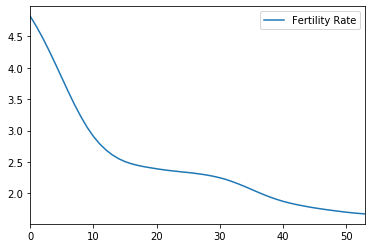

In [254]:
fertilityDf.plot()

In [255]:
fertilityModel = Prophet()

In [256]:
fertilityDf.rename(columns={'Date':'ds', 'Fertility Rate':'y'}, inplace=True)

In [257]:
fertilityDf.head()

,ds,y
0,1960-12-31,4.820
1,1961-12-31,4.655
2,1962-12-31,4.471
3,1963-12-31,4.271
4,1964-12-31,4.059


In [258]:
fertilityModel.fit(fertilityDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [259]:
ferFutureYears = fertilityModel.make_future_dataframe(periods=10, freq='Y')

In [260]:
ferFutureYears.tail(10)

,ds
54,2014-12-31
55,2015-12-31
56,2016-12-31
57,2017-12-31
58,2018-12-31
59,2019-12-31
60,2020-12-31
61,2021-12-31
62,2022-12-31
63,2023-12-31


In [261]:
ferPrediction = fertilityModel.predict(ferFutureYears)

In [262]:
ferPrediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
54,2014-12-31,-2.916584,1.642138,1.655139,-2.920031,-2.913625,4.565128,4.565128,4.565128,4.565128,4.565128,4.565128,0.0,0.0,0.0,1.648544
55,2015-12-31,-2.930436,1.617984,1.650280,-2.946606,-2.914605,4.564698,4.564698,4.564698,4.564698,4.564698,4.564698,0.0,0.0,0.0,1.634262
56,2016-12-31,-2.944326,1.589882,1.653672,-2.974604,-2.912486,4.565237,4.565237,4.565237,4.565237,4.565237,4.565237,0.0,0.0,0.0,1.620912
57,2017-12-31,-2.958177,1.555025,1.659205,-3.009667,-2.905119,4.565444,4.565444,4.565444,4.565444,4.565444,4.565444,0.0,0.0,0.0,1.607267
58,2018-12-31,-2.972029,1.517334,1.669549,-3.045349,-2.894940,4.565128,4.565128,4.565128,4.565128,4.565128,4.565128,0.0,0.0,0.0,1.593099
59,2019-12-31,-2.985881,1.478948,1.675261,-3.086721,-2.888918,4.564698,4.564698,4.564698,4.564698,4.564698,4.564698,0.0,0.0,0.0,1.578817
60,2020-12-31,-2.999771,1.437814,1.693504,-3.128173,-2.875229,4.565237,4.565237,4.565237,4.565237,4.565237,4.565237,0.0,0.0,0.0,1.565467
61,2021-12-31,-3.013622,1.388321,1.712943,-3.175197,-2.849636,4.565444,4.565444,4.565444,4.565444,4.565444,4.565444,0.0,0.0,0.0,1.551822
62,2022-12-31,-3.027474,1.337191,1.733130,-3.226412,-2.829955,4.565128,4.565128,4.565128,4.565128,4.565128,4.565128,0.0,0.0,0.0,1.537654
63,2023-12-31,-3.041326,1.279202,1.760117,-3.284461,-2.805090,4.564698,4.564698,4.564698,4.564698,4.564698,4.564698,0.0,0.0,0.0,1.523372


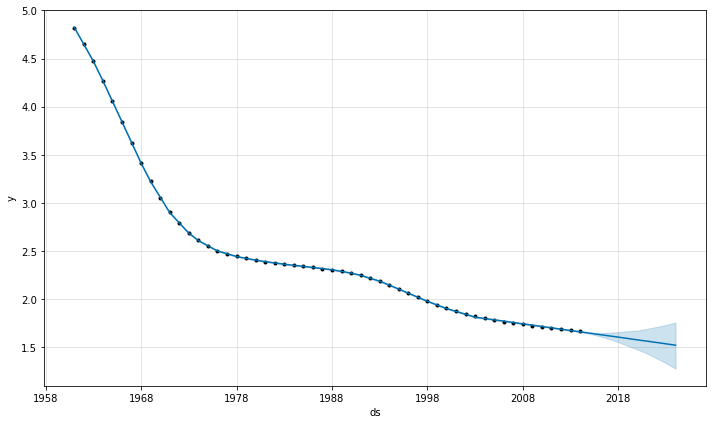

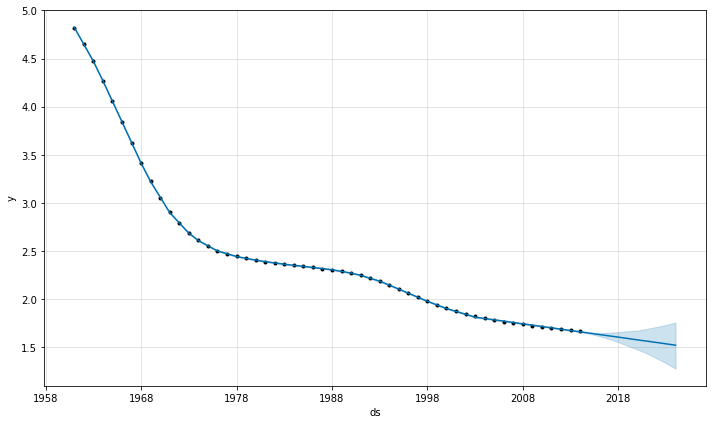

In [263]:
fertilityModel.plot(ferPrediction)

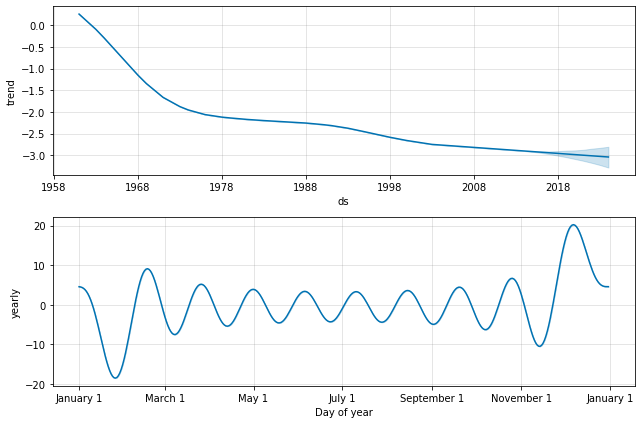

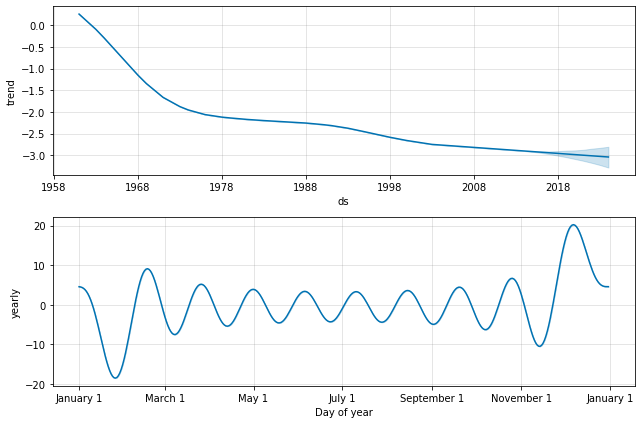

In [264]:
fertilityModel.plot_components(ferPrediction)

We have now completed the time scale analysis prediction model for the fertility rate of Aruba using the facebook Prophet API. We have shown in a graphic model using both matplotlib and Prophet that there is a decreasing trend in the data for Arubua's fertility rate and the prediction model produced by that data shows/suggests that within a margin of increasing error over 10 years it will continue to decrease. Thus answering our question on whether or not we can in fact predict the fertility rate of a country.

All that is left to do to draw our final conclusion is to put life expectancy through the same data process and draw our conclusion from the analysis of it then combine the three to answer our original question.

In [265]:
print(lifeExpectancyData.shape)
lifeExpectancyData.head(1)

(215, 58)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,...,74.090854,74.228073,74.375707,74.526244,74.67422,74.816146,74.952024,75.08039,75.206756,75.332171


In [266]:
dupdata = lifeExpectancyData[lifeExpectancyData.duplicated()]

print("Number of Duplicate Rows: ", dupdata.shape)

Number of Duplicate Rows:  (0, 58)


In [267]:
dupdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [268]:
print(lifeExpectancyData.isnull().sum())

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              26
1961              25
1962              25
1963              26
1964              26
1965              25
1966              25
1967              25
1968              25
1969              25
1970              24
1971              25
1972              25
1973              24
1974              25
1975              25
1976              25
1977              25
1978              23
1979              24
1980              23
1981              23
1982              19
1983              22
1984              22
1985              22
1986              21
1987              17
1988              21
1989              21
1990              19
1991              18
1992              17
1993              20
1994              18
1995              18
1996              18
1997              14
1998              18
1999              17
2000              14
2001              16
2002              12
2003         

okay there seems to be quite a substantial amount of data missing for life expectancy the highest of which i can see at a cursory glance is 26 missing values for 1960, speculation can be made for the apparent missing data, state of technological advancement, war etc but for sake of our data curation I will be focusing on the country of Aruba as I have for our previous two data-sets so if the data for aruba has no missing values we can ignore the rest as we will be essentially dropping that data as it does not contribute to answering our main question.

In [269]:
print(lifeExpectancyData.head(1).isnull().sum())

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
1961              0
1962              0
1963              0
1964              0
1965              0
1966              0
1967              0
1968              0
1969              0
1970              0
1971              0
1972              0
1973              0
1974              0
1975              0
1976              0
1977              0
1978              0
1979              0
1980              0
1981              0
1982              0
1983              0
1984              0
1985              0
1986              0
1987              0
1988              0
1989              0
1990              0
1991              0
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0


Although I feel that it is a cheat way of doing it but Aruba is the first country recorded on our datasets so we can grab its data using the head(1) method, as we could grap the last country's value using tail(1), however were it any other country we would have to tailor make a method to locate it and slice out the unwanted data. Thankfully in this case our ifnull().sum() shows that Aruba has no missing data for any of its fields and therefore we do not need to perform further preprocessing on our data before we start manipulating it into the form needed to pass it through the Facebook Prophet API.

In [270]:
lifeExpectancyData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [271]:
lifeExpectancyData.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [272]:
lifeExpectancyData.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.375707,74.526244,74.674220,74.816146,74.952024,75.080390,75.206756,75.332171
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,31.580049,32.095976,32.611878,33.127317,33.641244,34.153683,34.663122,35.170073,35.672024,...,56.569732,57.058439,57.570659,58.091366,58.607098,59.112341,59.600098,60.065366,60.509122,60.931415
3,Angola,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
4,Albania,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [273]:
lifeExpectancyData.transpose()

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
Country Name,Aruba,Andorra,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,West Bank and Gaza,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,65.5694,NaN,31.58,32.9848,62.2544,52.2432,65.2155,65.8635,NaN,61.7827,...,63.7302,59.067,46.4875,NaN,49.9695,32.3857,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.096,33.3862,63.2735,53.2866,65.3385,66.2844,NaN,62.1954,...,64.1016,59.7442,47.0881,NaN,50.4695,33.3205,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,32.6119,33.7876,64.1629,54.327,65.4326,66.7099,NaN,62.5985,...,64.4626,60.4105,47.6882,NaN,50.9695,34.2464,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.1273,34.1885,64.8871,55.3635,65.5094,67.1379,NaN,62.9926,...,64.8288,61.043,48.2873,NaN,51.4695,35.1618,50.1958,41.678,46.2092,52.6293
1964,67.0443,NaN,33.6412,34.5903,65.4382,56.3926,65.5824,67.5654,NaN,63.3786,...,65.2101,61.6071,48.8868,NaN,51.9695,36.0657,50.5818,41.918,46.5587,52.9717
1965,67.3698,NaN,34.1537,34.9922,65.8274,57.4057,65.6687,67.9915,NaN,63.7561,...,65.6116,61.9968,49.4848,NaN,52.4695,36.9537,50.9718,42.1805,46.913,53.3045
1966,67.699,NaN,34.6631,35.3951,66.0893,58.3919,65.7822,68.4147,NaN,64.1256,...,66.0326,62.0874,50.0831,NaN,52.9695,37.8216,51.363,42.4725,47.2863,53.6277
1967,68.0347,NaN,35.1701,35.8,66.2872,59.3405,65.93,68.8305,NaN,64.4881,...,66.4625,61.842,50.6818,NaN,53.4695,38.6715,51.7494,42.792,47.6865,53.9454
1968,68.3771,NaN,35.672,36.2059,66.475,60.244,66.1135,69.2293,NaN,64.8421,...,66.8927,61.293,51.2809,NaN,53.9695,39.507,52.126,43.1335,48.1136,54.2601


Our method for renaming our columns to the date-time format needed for facebook prophet instead of manually typing it, could extract into a seperate method however the code achieves the correct results in a sufficiently low time frame extracting it would only nominally increase performance therefore i will be keeping it as an individual for loop.

In [274]:
for item3, lifeExpDf in lifeExpectancyData.items():
    if item3 != "Country Name":
        print(item3)
        newName = item3+'-12-31'
        print(newName)
        lifeExpectancyData.rename(columns = {item3:newName}, inplace=True)

1960
1960-12-31
1961
1961-12-31
1962
1962-12-31
1963
1963-12-31
1964
1964-12-31
1965
1965-12-31
1966
1966-12-31
1967
1967-12-31
1968
1968-12-31
1969
1969-12-31
1970
1970-12-31
1971
1971-12-31
1972
1972-12-31
1973
1973-12-31
1974
1974-12-31
1975
1975-12-31
1976
1976-12-31
1977
1977-12-31
1978
1978-12-31
1979
1979-12-31
1980
1980-12-31
1981
1981-12-31
1982
1982-12-31
1983
1983-12-31
1984
1984-12-31
1985
1985-12-31
1986
1986-12-31
1987
1987-12-31
1988
1988-12-31
1989
1989-12-31
1990
1990-12-31
1991
1991-12-31
1992
1992-12-31
1993
1993-12-31
1994
1994-12-31
1995
1995-12-31
1996
1996-12-31
1997
1997-12-31
1998
1998-12-31
1999
1999-12-31
2000
2000-12-31
2001
2001-12-31
2002
2002-12-31
2003
2003-12-31
2004
2004-12-31
2005
2005-12-31
2006
2006-12-31
2007
2007-12-31
2008
2008-12-31
2009
2009-12-31
2010
2010-12-31
2011
2011-12-31
2012
2012-12-31
2013
2013-12-31


In [275]:
lifeExpectancyData.head(1)

,Country Name,1960-12-31,1961-12-31,1962-12-31,1963-12-31,1964-12-31,1965-12-31,1966-12-31,1967-12-31,1968-12-31,...,2004-12-31,2005-12-31,2006-12-31,2007-12-31,2008-12-31,2009-12-31,2010-12-31,2011-12-31,2012-12-31,2013-12-31
0,Aruba,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699,68.034683,68.377146,...,74.090854,74.228073,74.375707,74.526244,74.67422,74.816146,74.952024,75.08039,75.206756,75.332171


In [276]:
newLifeData = []
for year, i in lifeExpectancyData.items():
    if year != "Country Name":
       ## print date.
   
        newLifeData.append(year)

print(newLifeData)

['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31']


In [277]:
lifeColumn = lifeExpectancyData
lifeColumn.drop(["Country Name"], axis=1, inplace=True)

In [278]:
lifedates = lifeColumn.columns
print(lifedates)

Index(['1960-12-31', '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
       '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31',
       '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31', '1974-12-31',
       '1975-12-31', '1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
       '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
       '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31',
       '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31',
       '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
       '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
       '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
       '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31'],
      dtype='object')


In [279]:
lifeExpectancy = lifeExpectancyData.iloc[0]
life = lifeExpectancy.iloc[0:]
print(lifedates.shape)
print(life.shape)

(54,)
(54,)


In [280]:
lifeData = []
for x in range(0,len(life)):
    lifeData.append([lifedates[x], life.iloc[x]])
print(lifeData)
lifeDf = pd.DataFrame(lifeData, columns=['Date','Life Expectancy'])

[['1960-12-31', 65.56936585365855], ['1961-12-31', 65.98802439024391], ['1962-12-31', 66.36553658536586], ['1963-12-31', 66.71397560975609], ['1964-12-31', 67.04429268292684], ['1965-12-31', 67.36975609756098], ['1966-12-31', 67.69900000000001], ['1967-12-31', 68.03468292682928], ['1968-12-31', 68.37714634146343], ['1969-12-31', 68.72841463414636], ['1970-12-31', 69.08614634146342], ['1971-12-31', 69.44609756097562], ['1972-12-31', 69.79865853658536], ['1973-12-31', 70.13965853658537], ['1974-12-31', 70.46529268292683], ['1975-12-31', 70.77780487804878], ['1976-12-31', 71.0808292682927], ['1977-12-31', 71.37770731707317], ['1978-12-31', 71.66978048780489], ['1979-12-31', 71.9528536585366], ['1980-12-31', 72.22014634146342], ['1981-12-31', 72.46234146341463], ['1982-12-31', 72.67319512195122], ['1983-12-31', 72.84902439024391], ['1984-12-31', 72.98975609756098], ['1985-12-31', 73.0979756097561], ['1986-12-31', 73.17936585365854], ['1987-12-31', 73.24270731707318], ['1988-12-31', 73.2962

In [281]:
lifeDf.head()

,Date,Life Expectancy
0,1960-12-31,65.569366
1,1961-12-31,65.988024
2,1962-12-31,66.365537
3,1963-12-31,66.713976
4,1964-12-31,67.044293


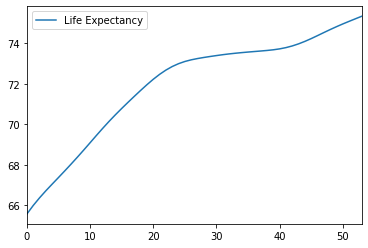

In [282]:
lifeDf.plot()

Model shows clearly that over the 50+ values that the life expectancy in Aruba has been increasing at difderent rates giving us a theory to say that our predictive time date analysis model will suggest the same using that data.
However now that this stage is complete we must change our headers to be the required ones for fecebook Prophet.

In [283]:
lifeDf.columns

Index(['Date', 'Life Expectancy'], dtype='object')

In [284]:
lifeDf.rename(columns={'Date':'ds','Life Expectancy':'y'},inplace=True)

In [285]:
lifeDf.head()

,ds,y
0,1960-12-31,65.569366
1,1961-12-31,65.988024
2,1962-12-31,66.365537
3,1963-12-31,66.713976
4,1964-12-31,67.044293


In [286]:
lifeModel = Prophet()

In [287]:
lifeModel.fit(lifeDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [288]:
lifeFutureYears = lifeModel.make_future_dataframe(periods=10, freq='Y')

In [289]:
lifeFutureYears.tail(10)

,ds
54,2014-12-31
55,2015-12-31
56,2016-12-31
57,2017-12-31
58,2018-12-31
59,2019-12-31
60,2020-12-31
61,2021-12-31
62,2022-12-31
63,2023-12-31


In [290]:
lifePrediction = lifeModel.predict(lifeFutureYears)

In [291]:
lifePrediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
54,2014-12-31,13.551646,75.475997,75.504662,13.545421,13.560285,61.938273,61.938273,61.938273,61.938273,61.938273,61.938273,0.0,0.0,0.0,75.489919
55,2015-12-31,13.689080,75.591272,75.660818,13.655880,13.720574,61.937750,61.937750,61.937750,61.937750,61.937750,61.937750,0.0,0.0,0.0,75.626830
56,2016-12-31,13.826891,75.691017,75.827956,13.759716,13.897919,61.931267,61.931267,61.931267,61.931267,61.931267,61.931267,0.0,0.0,0.0,75.758159
57,2017-12-31,13.964326,75.789060,76.014524,13.853243,14.078230,61.934256,61.934256,61.934256,61.934256,61.934256,61.934256,0.0,0.0,0.0,75.898582
58,2018-12-31,14.101760,75.884780,76.214134,13.946369,14.269353,61.938273,61.938273,61.938273,61.938273,61.938273,61.938273,0.0,0.0,0.0,76.040034
59,2019-12-31,14.239195,75.976961,76.399124,14.039988,14.464720,61.937750,61.937750,61.937750,61.937750,61.937750,61.937750,0.0,0.0,0.0,76.176945
60,2020-12-31,14.377006,76.056593,76.595964,14.125414,14.659996,61.931267,61.931267,61.931267,61.931267,61.931267,61.931267,0.0,0.0,0.0,76.308273
61,2021-12-31,14.514440,76.126686,76.787762,14.193662,14.854464,61.934256,61.934256,61.934256,61.934256,61.934256,61.934256,0.0,0.0,0.0,76.448697
62,2022-12-31,14.651875,76.204456,76.995289,14.270567,15.057415,61.938273,61.938273,61.938273,61.938273,61.938273,61.938273,0.0,0.0,0.0,76.590148
63,2023-12-31,14.789309,76.280267,77.205539,14.338012,15.268408,61.937750,61.937750,61.937750,61.937750,61.937750,61.937750,0.0,0.0,0.0,76.727059


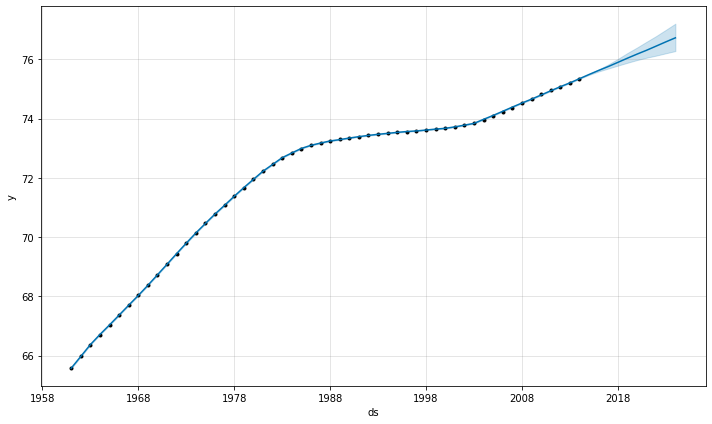

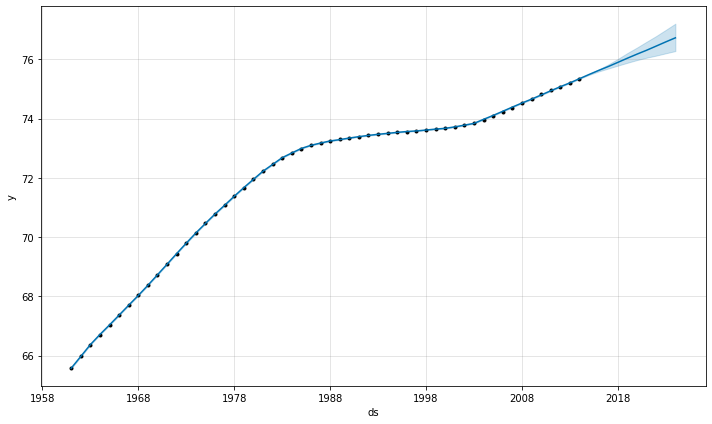

In [292]:
lifeModel.plot(lifePrediction)

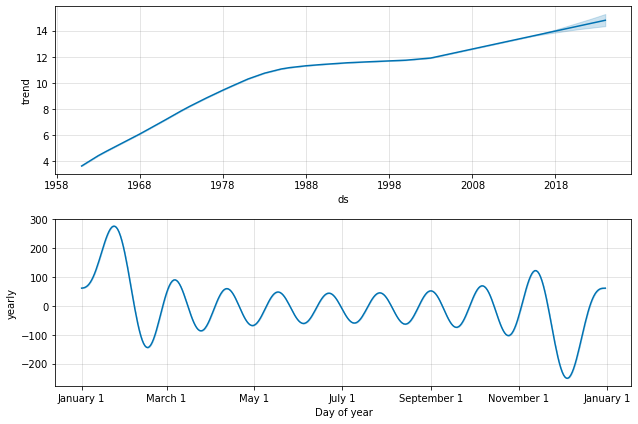

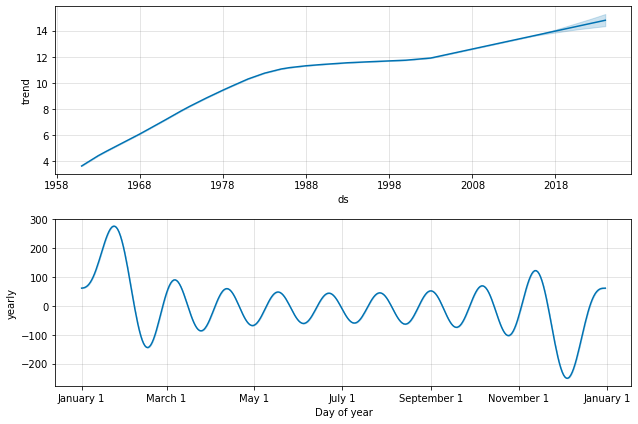

In [293]:
lifeModel.plot_components(lifePrediction)

We have now completed the time scale analysis prediction model for the life expectancy of Aruba using the facebook Prophet API. We have shown in a graphic model using both matplotlib and Prophet that there is an increasing trend in the data for Arubua's life expectancy as we theorized by looking at the original model; and the prediction model produced by that data shows/suggests that within a margin of increasing error over 10 years it will continue to increase. Thus answering our question on whether or not we can in fact predict the life expectancy of a country.

In summation:

Question: Can we make predictions on future populations, fertility rates and life expectancies in a selected country and identify the trend of the predictions given.

Conclusion: We have conclusively proven that we can make predictions on all three of the subjects alongside showing and analyzing their trends; being population, fertility rate and life expectancy. Through the use of time series analysis using Facebook Prophet on the selected coutnry of Aruba, we show that the predicted population trends are positive (increasing), the fertility rate of Aruba is negative (decreasing) and that the life expectancy is positive (increasing) each by year on an analysis for figures assumed to be taken on the 31'st day of the 12'th month each year (last day of the year on the Gregorian Calendar).